# Libraries and Bring data in 

Probe Lenght is   [7.8]
Probe Type  is   ['BUR']


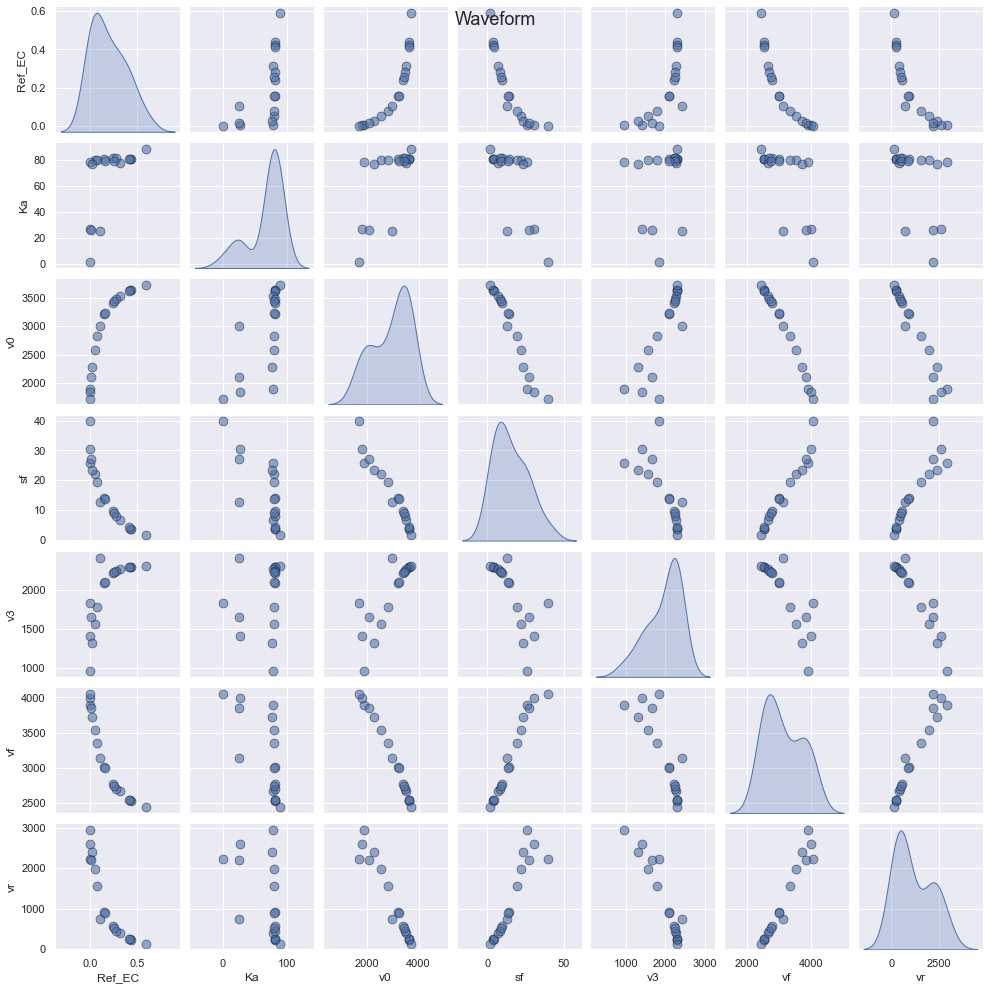

In [44]:
#Enter Probe tine lenght and type
tine_lenght = 7.8
probe_type = 'BUR'


import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


mod_data = pd.read_csv('https://raw.githubusercontent.com/KeithBellingham/ML_Small_data_sets/main/model_input.csv')


mod_dfa = mod_data.loc[(mod_data['Probe_L']== tine_lenght) & (mod_data['Probe_type']== probe_type)]  
mod_dfa.reset_index(drop = True, inplace = True)
mod_dfb = mod_dfa.copy()


print("Probe Lenght is  ", mod_dfb.Probe_L.unique())
print("Probe Type  is  ", mod_dfb.Probe_type.unique())



#make Pairplot
sns.pairplot(mod_dfb, 
             vars = ['Ref_EC','Ka', 'v0', 'sf', 'v3', 'vf', 'vr'],#'ECtopp'], 
             #hue = 'L', change color based on a class
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 2);
# Title 
plt.suptitle('Waveform', 
             size = 18);



#prepair data for Model
column_names = ['Ka','v0', 'v3', 'vf', 'vr', 'sf', 'ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=2)


# Linear Regression

lr_Train r^2 is   0.9998150589631479
lr_Train real RMSE is  : 0.001970281972156131
lr_eval r^2 is   0.9948678635390106
lr_eval RMSE is  : 0.019878913112418305
lr_final  r^2 is   0.9993521122897076
lr_Final RMSE is  : 0.004478801474962221
intercept 0.18513268124465024
wieghts coe wi Ka       -0.000187
v0        0.000011
v3       -0.000040
vf       -0.000033
vr        0.000007
sf       -0.001074
ECtopp    0.928325
dtype: float64


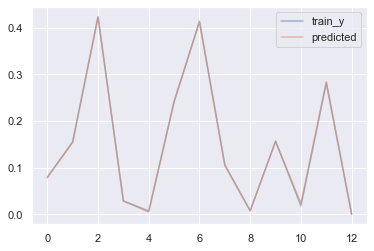

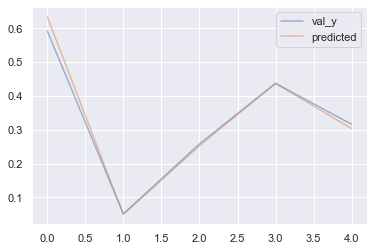

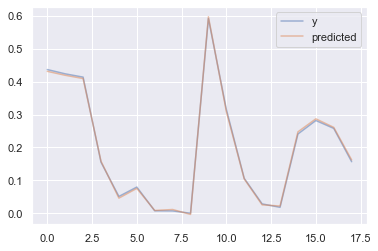

In [2]:

#LinearRegression

#model Training set
lr_model_train = LinearRegression(fit_intercept=True)
lr_model_train.fit(train_X, train_y)
lr_train_predict = lr_model_train.predict(train_X)
lr_train_df = pd.DataFrame()
lr_train_df['train_y'] = train_y
lr_train_df['predicted'] = lr_train_predict
lr_train_df.reset_index(drop=True, inplace=True)
lr_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("lr_Train r^2 is  ",(lr_train_df['train_y'].corr(lr_train_df['predicted']))**2)
print("lr_Train real RMSE is  :",((lr_train_df['predicted'] - lr_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate error
#lr_model_eval = LinearRegression(fit_intercept=True)
#lr_model_eval.fit(train_X, train_y)
lr_eval_predict = lr_model_train.predict(val_X)
#lr_eval_mae = mean_absolute_error(lr_eval_predict, val_y)

#print("Test MAE is ", lr_eval_mae)

lr_eval_df = pd.DataFrame()
lr_eval_df['val_y'] = val_y
lr_eval_df['predicted'] = lr_eval_predict
lr_eval_df.reset_index(drop=True, inplace=True)
lr_eval_df[['val_y', 'predicted']].plot(alpha=0.5);

print("lr_eval r^2 is  ",(lr_eval_df['val_y'].corr(lr_eval_df['predicted']))**2)
print("lr_eval RMSE is  :",((lr_eval_df['predicted'] - lr_eval_df['val_y']) ** 2).mean() ** .5)


#model all for production
lr_model_final = LinearRegression(fit_intercept=True)
lr_model_final.fit(X, y)
lr_final_predict = lr_model_final.predict(X)
lr_final_df = pd.DataFrame()
lr_final_df['y'] = y
lr_final_df['predicted'] = lr_final_predict
lr_final_df.reset_index(drop=True, inplace=True)
lr_final_df[['y', 'predicted']].plot(alpha=0.5);

print("lr_final  r^2 is  ",(lr_final_df['y'].corr(lr_final_df['predicted']))**2)
print("lr_Final RMSE is  :",((lr_final_df['predicted'] - lr_final_df['y']) ** 2).mean() ** .5)





params = pd.Series(lr_model_final.coef_, index=X.columns)
print("intercept", lr_model_final.intercept_)
print("wieghts coe wi", params)

 

# Ridge Regresion

ridgelr_Train r^2 is   0.99980580966257
ridgelr_Train real RMSE is  : 0.002019924623502951
ridgelr_eval r^2 is   0.9958179878497634
ridgelr_eval RMSE is  : 0.01777631135247347
ridgelr_final  r^2 is   0.9993517362132421
ridgelr_Final RMSE is  : 0.00448018303121205
intercept 0.19861188034738028
wieghts coe wi Ka       -0.000198
v0        0.000011
v3       -0.000042
vf       -0.000036
vr        0.000006
sf       -0.001043
ECtopp    0.925919
dtype: float64


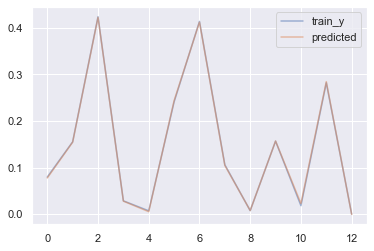

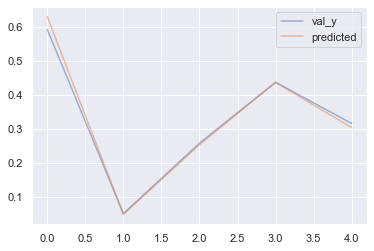

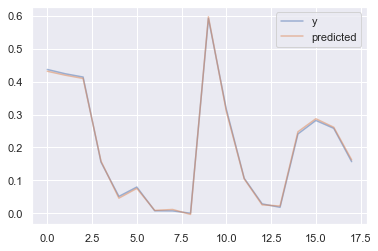

In [33]:
#Ridge Regresion

a=0.0001

#model Training set
ridgelr_model_train = Ridge(alpha=a, solver="cholesky")
ridgelr_model_train.fit(train_X, train_y)
ridgelr_train_predict = ridgelr_model_train.predict(train_X)
ridgelr_train_df = pd.DataFrame()
ridgelr_train_df['train_y'] = train_y
ridgelr_train_df['predicted'] = ridgelr_train_predict
ridgelr_train_df.reset_index(drop=True, inplace=True)
ridgelr_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("ridgelr_Train r^2 is  ",(ridgelr_train_df['train_y'].corr(ridgelr_train_df['predicted']))**2)
print("ridgelr_Train real RMSE is  :",((ridgelr_train_df['predicted'] - ridgelr_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate error

ridgelr_eval_predict = ridgelr_model_train.predict(val_X)


ridgelr_eval_df = pd.DataFrame()
ridgelr_eval_df['val_y'] = val_y
ridgelr_eval_df['predicted'] = ridgelr_eval_predict
ridgelr_eval_df.reset_index(drop=True, inplace=True)
ridgelr_eval_df[['val_y', 'predicted']].plot(alpha=0.5);

print("ridgelr_eval r^2 is  ",(ridgelr_eval_df['val_y'].corr(ridgelr_eval_df['predicted']))**2)
print("ridgelr_eval RMSE is  :",((ridgelr_eval_df['predicted'] - ridgelr_eval_df['val_y']) ** 2).mean() ** .5)


#model all for production
ridgelr_model_final = Ridge(alpha=a, solver="cholesky")
ridgelr_model_final.fit(X, y)
ridgelr_final_predict = ridgelr_model_final.predict(X)
ridgelr_final_df = pd.DataFrame()
ridgelr_final_df['y'] = y
ridgelr_final_df['predicted'] = ridgelr_final_predict
ridgelr_final_df.reset_index(drop=True, inplace=True)
ridgelr_final_df[['y', 'predicted']].plot(alpha=0.5);

print("ridgelr_final  r^2 is  ",(ridgelr_final_df['y'].corr(ridgelr_final_df['predicted']))**2)
print("ridgelr_Final RMSE is  :",((ridgelr_final_df['predicted'] - ridgelr_final_df['y']) ** 2).mean() ** .5)





ridge_params = pd.Series(ridgelr_model_final.coef_, index=X.columns)
print("intercept", ridgelr_model_final.intercept_)
print("wieghts coe wi", ridge_params)

 



# Ridge Regresion Grid Search

In [32]:
parameters = {'alpha':[0.0001, 0.001, 0.01, 1, 10, 100]}

# define the model/ estimator
ridge_dev_model = Ridge()

# define the grid search
ridge_reg= GridSearchCV(ridge_dev_model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
ridge_reg.fit(X,y)

# best estimator
print(ridge_reg.best_estimator_)

# best model
best_model = ridge_reg.best_estimator_
best_model.fit(X,y)

Ridge(alpha=0.0001)


Ridge(alpha=0.0001)

# Random Forest

In [42]:

rf_param_grid = [
        {'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 4, 6, 8], 'max_leaf_nodes':[10, 50, 100, 150, 200, 300]},
        {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 3, 4, 6, 8],'max_leaf_nodes':[10, 50, 100, 150, 200, 300] },
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, rf_param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(X, y)
grid_search.best_params_

{'bootstrap': False,
 'max_features': 2,
 'max_leaf_nodes': 200,
 'n_estimators': 10}

rf_Train r^2 is   1.0
rf_Train RMSE is  : 2.803873431219651e-17
rf_val r^2 is   0.8454888627560615
rf_val RMSE is  : 0.08906078530980963
rf_final  r^2 is   1.0
rf_Final RMSE is  : 3.9970331913194236e-17


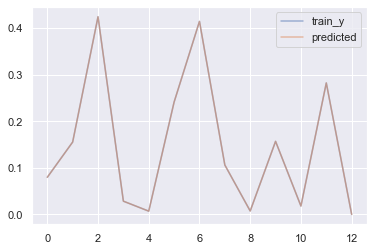

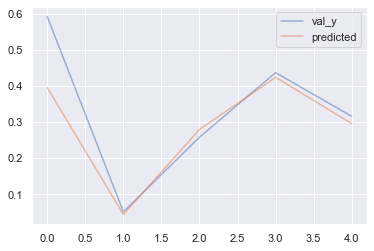

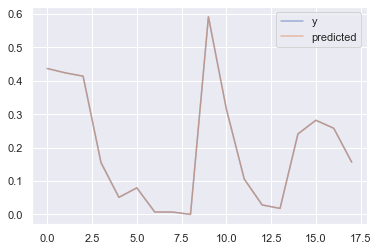

In [43]:
##Random Forest


#Random Forest Train

rf_model_train = RandomForestRegressor(max_leaf_nodes=200, random_state=1, bootstrap=False, max_features=2, n_estimators=10)
# Fit Model
rf_model_train.fit(train_X, train_y)
rf_train_predict = rf_model_train.predict(train_X)

rf_train_df = pd.DataFrame()
rf_train_df['train_y'] = train_y
rf_train_df['predicted'] = rf_train_predict
rf_train_df.reset_index(drop=True, inplace=True)
rf_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("rf_Train r^2 is  ",(rf_train_df['train_y'].corr(rf_train_df['predicted']))**2)
print("rf_Train RMSE is  :",((rf_train_df['predicted'] - rf_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
rf_val_predictions = rf_model_train.predict(val_X)

rf_val_df = pd.DataFrame()
rf_val_df['val_y'] = val_y
rf_val_df['predicted'] = rf_val_predictions
rf_val_df.reset_index(drop=True, inplace=True)
rf_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("rf_val r^2 is  ",(rf_val_df['val_y'].corr(rf_val_df['predicted']))**2)
print("rf_val RMSE is  :",((rf_val_df['predicted'] - rf_val_df['val_y']) ** 2).mean() ** .5)


#model all for production
rf_model_final = RandomForestRegressor(max_leaf_nodes=200, random_state=1, bootstrap=False, max_features=2, n_estimators=10)

rf_model_final.fit(X, y)
rf_final_predict = rf_model_final.predict(X)
rf_final_df = pd.DataFrame()
rf_final_df['y'] = y
rf_final_df['predicted'] = rf_final_predict
rf_final_df.reset_index(drop=True, inplace=True)
rf_final_df[['y', 'predicted']].plot(alpha=0.5);

print("rf_final  r^2 is  ",(rf_final_df['y'].corr(rf_final_df['predicted']))**2)
print("rf_Final RMSE is  :",((rf_final_df['predicted'] - rf_final_df['y']) ** 2).mean() ** .5)





# Support Vecter Machine

In [60]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10, 100],
              'gamma': [1e-7, 1e-4, 0.001, .01],
              'epsilon':[0.1,0.2,0.5,0.3, 1, 1.5],
              'degree' :[1, 2, 3, 4, 5, 6, 7]
             }
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X,y)
clf.best_params_

#best_model = ridge_reg.best_estimator_
#best_model.fit(X,y)

{'C': 1.5, 'degree': 5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'poly'}

svm_Train r^2 is   0.908176748696658
svm_Train RMSE is  : 0.07674618219105685
svm_val r^2 is   0.837283354144404
svm_val RMSE is  : 0.1273770694653991
svm_final  r^2 is   0.895057405682814
svm_Final RMSE is  : 0.06740403015018083


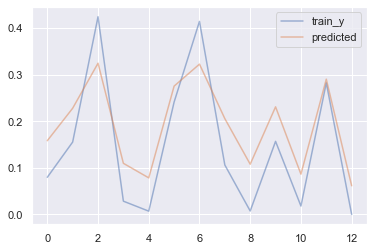

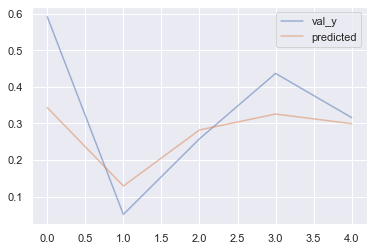

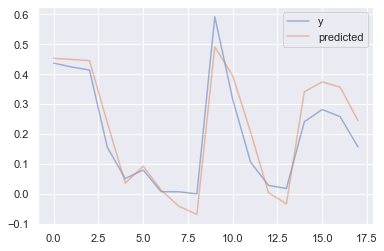

In [59]:
svm_model_train = SVR(kernel='poly', degree=5, C=1.5, epsilon=0.1, gamma=0.0000001)
# Fit Model
svm_model_train.fit(train_X, train_y)
svm_train_predict = svm_model_train.predict(train_X)

svm_train_df = pd.DataFrame()
svm_train_df['train_y'] = train_y
svm_train_df['predicted'] = svm_train_predict
svm_train_df.reset_index(drop=True, inplace=True)
svm_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("svm_Train r^2 is  ",(svm_train_df['train_y'].corr(svm_train_df['predicted']))**2)
print("svm_Train RMSE is  :",((svm_train_df['predicted'] - svm_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
svm_val_predictions = svm_model_train.predict(val_X)

svm_val_df = pd.DataFrame()
svm_val_df['val_y'] = val_y
svm_val_df['predicted'] = svm_val_predictions
svm_val_df.reset_index(drop=True, inplace=True)
svm_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("svm_val r^2 is  ",(svm_val_df['val_y'].corr(svm_val_df['predicted']))**2)
print("svm_val RMSE is  :",((svm_val_df['predicted'] - svm_val_df['val_y']) ** 2).mean() ** .5)


#model all for production
svm_model_final = SVR(kernel='poly', degree=5, C=1.5, epsilon=0.1, gamma=0.0000001)
svm_model_final.fit(X, y)
svm_final_predict = svm_model_final.predict(X)
svm_final_df = pd.DataFrame()
svm_final_df['y'] = y
svm_final_df['predicted'] = svm_final_predict
svm_final_df.reset_index(drop=True, inplace=True)
svm_final_df[['y', 'predicted']].plot(alpha=0.5);

print("svm_final  r^2 is  ",(svm_final_df['y'].corr(svm_final_df['predicted']))**2)
print("svm_Final RMSE is  :",((svm_final_df['predicted'] - svm_final_df['y']) ** 2).mean() ** .5)


In [53]:
r = """ 
rf_model_train = RandomForestRegressor(max_leaf_nodes=200, random_state=1, bootstrap=False, max_features=2, n_estimators=10)
# Fit Model
rf_model_train.fit(train_X, train_y)
rf_train_predict = rf_model_train.predict(train_X)

rf_train_df = pd.DataFrame()
rf_train_df['train_y'] = train_y
rf_train_df['predicted'] = rf_train_predict
rf_train_df.reset_index(drop=True, inplace=True)
rf_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("rf_Train r^2 is  ",(rf_train_df['train_y'].corr(rf_train_df['predicted']))**2)
print("rf_Train RMSE is  :",((rf_train_df['predicted'] - rf_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
rf_val_predictions = rf_model_train.predict(val_X)

rf_val_df = pd.DataFrame()
rf_val_df['val_y'] = val_y
rf_val_df['predicted'] = rf_val_predictions
rf_val_df.reset_index(drop=True, inplace=True)
rf_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("rf_val r^2 is  ",(rf_val_df['val_y'].corr(rf_val_df['predicted']))**2)
print("rf_val RMSE is  :",((rf_val_df['predicted'] - rf_val_df['val_y']) ** 2).mean() ** .5)


#model all for production
rf_model_final = RandomForestRegressor(max_leaf_nodes=200, random_state=1, bootstrap=False, max_features=2, n_estimators=10)

rf_model_final.fit(X, y)
rf_final_predict = rf_model_final.predict(X)
rf_final_df = pd.DataFrame()
rf_final_df['y'] = y
rf_final_df['predicted'] = rf_final_predict
rf_final_df.reset_index(drop=True, inplace=True)
rf_final_df[['y', 'predicted']].plot(alpha=0.5);

print("rf_final  r^2 is  ",(rf_final_df['y'].corr(rf_final_df['predicted']))**2)
print("rf_Final RMSE is  :",((rf_final_df['predicted'] - rf_final_df['y']) ** 2).mean() ** .5)



"""
x = r.replace("rf",  "svm")
print(x)


 
svm_model_train = RandomForestRegressor(max_leaf_nodes=200, random_state=1, bootstrap=False, max_features=2, n_estimators=10)
# Fit Model
svm_model_train.fit(train_X, train_y)
svm_train_predict = svm_model_train.predict(train_X)

svm_train_df = pd.DataFrame()
svm_train_df['train_y'] = train_y
svm_train_df['predicted'] = svm_train_predict
svm_train_df.reset_index(drop=True, inplace=True)
svm_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("svm_Train r^2 is  ",(svm_train_df['train_y'].corr(svm_train_df['predicted']))**2)
print("svm_Train RMSE is  :",((svm_train_df['predicted'] - svm_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
svm_val_predictions = svm_model_train.predict(val_X)

svm_val_df = pd.DataFrame()
svm_val_df['val_y'] = val_y
svm_val_df['predicted'] = svm_val_predictions
svm_val_df.reset_index(drop=True, inplace=True)
svm_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("svm_val r^2 is  ",(svm_val_